In [ ]:
import matplotlib.pyplot as plt
import numpy as np

use_overall_accuracy = True

data = {}
#disregard_datasets = ["shadowlinks-shadow", "shadowlinks-tail", "shadowlinks-top"]
disregard_datasets = []

with open('Results/Multi-Evaluate-Overview/finals_dyn-overview.txt', 'r') as f:
    for idx, line in enumerate(f):
        if idx < 2:
            continue
        corpus = line.split('--')[0].strip()

        if use_overall_accuracy:
            accuracy = line.split('/')[3].strip().split(' ')[0][:-1]    # Overall Accuracy
            de_accuracy = line.split('/')[4].split('|')[0].strip().split(' ')[0][:-1]   # Overall DE Accuracy
        else:
            accuracy = line.split(' ')[1].strip()[:-1][-5:]  # LLM Accuracy
            de_accuracy = line.split('/')[1].strip().split(' ')[0][:-1] # DE Hard Cases Accuracy

        # Add to data dict
        if corpus in disregard_datasets:
            continue
        if corpus not in data:
            data[corpus] = []
        data[corpus].append((float(accuracy), float(de_accuracy)))

print(data)


{'AIDA': [(84.53, 80.18), (84.75, 80.18), (84.59, 80.18)], 'cweb': [(71.61, 69.37), (71.58, 69.37), (71.61, 69.37)], 'tweeki': [(81.54, 77.22), (82.01, 77.22), (81.89, 77.22)], 'reddit-comments': [(88.54, 85.24), (88.23, 85.24), (88.38, 85.24)], 'shadowlinks-shadow': [(72.23, 65.27), (71.9, 65.27), (72.46, 65.27)], 'shadowlinks-tail': [(98.67, 98.55), (98.55, 98.55), (98.55, 98.55)], 'shadowlinks-top': [(75.22, 65.82), (75.33, 65.82), (75.11, 65.82)], 'reddit-posts': [(90.61, 89.05), (90.47, 89.05), (90.33, 89.05)], 'wned-wiki': [(91.46, 91.01), (91.62, 91.01), (91.56, 91.01)]}


### Compute avg data

In [11]:
avg_data = {}

for corpus in data:
    avg_accuracy = np.mean([x[0] for x in data[corpus]])
    avg_de_accuracy = np.mean([x[1] for x in data[corpus]])
    avg_data[corpus] = (avg_accuracy, avg_de_accuracy)

overall_avg = (np.mean([x[0] for x in avg_data.values()]), np.mean([x[1] for x in avg_data.values()]))

avg_data

{'AIDA': (84.62333333333333, 80.18),
 'cweb': (71.60000000000001, 69.37),
 'tweeki': (81.81333333333333, 77.22),
 'reddit-comments': (88.38333333333333, 85.24),
 'shadowlinks-shadow': (72.19666666666666, 65.27),
 'shadowlinks-tail': (98.58999999999999, 98.55),
 'shadowlinks-top': (75.22000000000001, 65.82),
 'reddit-posts': (90.46999999999998, 89.05),
 'wned-wiki': (91.54666666666667, 91.01)}

### Do Bar Chart

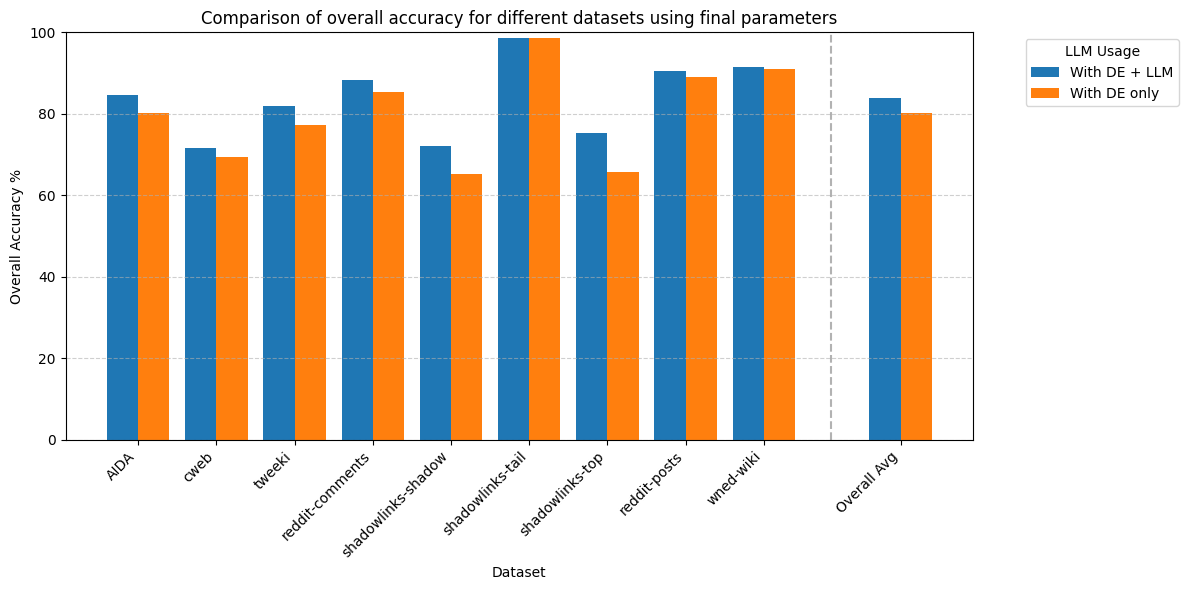

In [12]:
# Add space for the "Overall Average" slot
num_datasets = len(avg_data)
x = np.arange(num_datasets + 1, dtype=float)
gap = 0.75
x[-1] += gap   # push the “overall avg” cluster rightward
bar_width = 0.8 / 2

plt.figure(figsize=(12, 6))

colors = plt.cm.tab10.colors

bars = []
# --- Plot grouped bars (datasets + overall) ---
for i in range(2):
    param_values = [avg_data[corpus][i] for corpus in avg_data] + [overall_avg[i]]
    bars.append(plt.bar(
        x + i * bar_width,
        param_values,
        width=bar_width,
        label="With DE + LLM" if i == 0 else "With DE only",
        color=colors[i % len(colors)]
    ))


# --- X-axis labels ---
all_labels = list(avg_data.keys()) + ["Overall Avg"]

plt.xticks(
    x + bar_width * (1) / 2,
    all_labels,
    rotation=45,
    ha="right"
)

# --- Aesthetics ---
separator_x = (x[-2] + x[-1]) / 1.96
plt.axvline(separator_x, color="gray", linestyle="--", alpha=0.6)
plt.ylim(0, 100)
plt.xlabel("Dataset")
plt.ylabel(f"{'Overall' if use_overall_accuracy else 'LLM'} Accuracy %")
plt.title(f"Comparison of {'overall' if use_overall_accuracy else 'LLM'} accuracy for different datasets using final parameters")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.legend(title="LLM Usage", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Print as LaTeX table

In [13]:
for dataset in avg_data:
    print(f"{dataset} & & & {avg_data[dataset][0]:.2f} & {avg_data[dataset][1]:.2f} & & \\\\")
    print("\\hline")
print(f"\\textbf{{Overall Average}} & & & {overall_avg[0]:.2f} & {overall_avg[1]:.2f} & & \\\\")

AIDA & & & 84.62 & 80.18 & & \\
\hline
cweb & & & 71.60 & 69.37 & & \\
\hline
tweeki & & & 81.81 & 77.22 & & \\
\hline
reddit-comments & & & 88.38 & 85.24 & & \\
\hline
shadowlinks-shadow & & & 72.20 & 65.27 & & \\
\hline
shadowlinks-tail & & & 98.59 & 98.55 & & \\
\hline
shadowlinks-top & & & 75.22 & 65.82 & & \\
\hline
reddit-posts & & & 90.47 & 89.05 & & \\
\hline
wned-wiki & & & 91.55 & 91.01 & & \\
\hline
\textbf{Overall Average} & & & 83.83 & 80.19 & & \\
